## Machine Learning Assignment 5
#### Section 1 Ji Hyun Kim

**Database Information:**

Order: Order of buying the tickets

Entry: 0 is denied, 1 is approved

Ticket class: 1.2.3 different types of tickets

Sex: Gender

Age: Age

Price: Price of Ticket

Name: Name of buyer

Ticket: Ticket number

Bank Balance: Bank balance of ticket buyer

In [220]:
# Load Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans

In [221]:
# Import the dataset
df = pd.read_csv("Event_entry.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Sex            869 non-null    object 
 3   Age            694 non-null    float64
 4   Price          869 non-null    int64  
 5   Order          869 non-null    int64  
 6   Name           869 non-null    object 
 7   Ticket Number  869 non-null    int64  
 8   Bank Balance   869 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


In [222]:
df.head()

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance
0,0,3,male,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389
1,1,1,female,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932
2,1,3,female,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146
3,1,1,female,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627
4,0,3,male,35.0,8,5,"Allen, Mr. William Henry",510583,60457


##### 1. Data Exploration and Visualization (20)
Explore Event_entry(in Files) dataset.

Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.

Include any other plots you find interesting and provide brief interpretations.

In [223]:
# Check if the mising values exist: 175 occurences for age 
df.isnull().sum()

Entry              0
TicketClass        0
Sex                0
Age              175
Price              0
Order              0
Name               0
Ticket Number      0
Bank Balance       0
dtype: int64

29.73223342939481 28.0


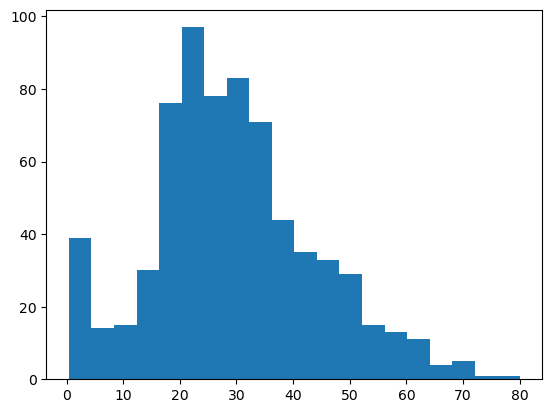

In [224]:
# Check the distribution of the age to get idea of how to impute the missing values 
print(df['Age'].mean(), df['Age'].median())
plt.hist(df['Age'], bins=20)
plt.show()
# A little skewed to right, thue use median imputation

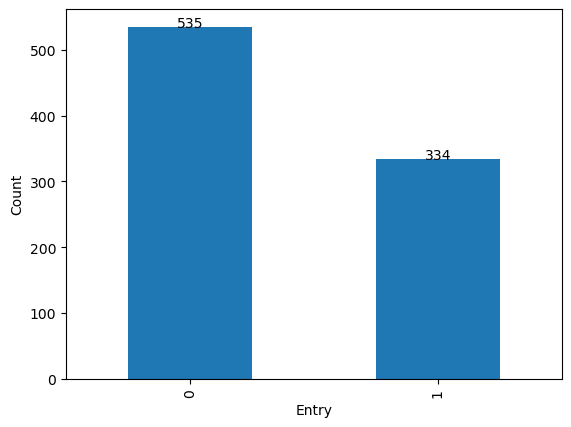

In [225]:
# Plot a bar plot comparing the size of Entry = 0/1
entry = df.groupby('Entry').size()
entry_plt = entry.plot(kind = 'bar')

plt.xlabel('Entry')
plt.ylabel('Count')
for i in entry_plt.patches:
    entry_plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center')

plt.show()


In the dataset, there're more people who were rejected than accepted.

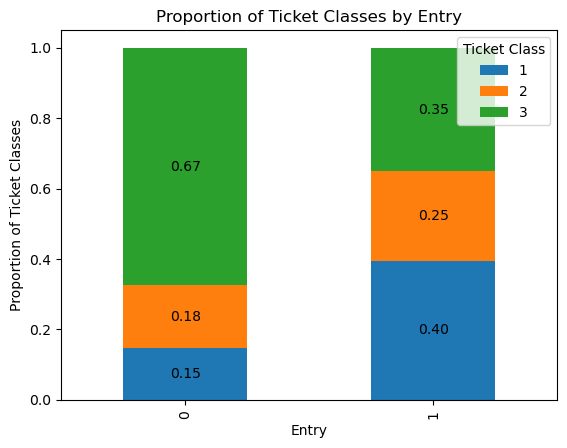

In [226]:
# Calculate the proportion of ticket classes within each entry and plot a stacked bar plot
entry_tk = df.groupby(['Entry','TicketClass']).size()
unstack_entry_tk = entry_tk.unstack(fill_value=0)
prop_entry_tk = unstack_entry_tk.div(unstack_entry_tk.sum(axis=1), axis=0)
prop_entry_tk_bar = prop_entry_tk.plot(kind='bar', stacked=True)

plt.xlabel('Entry')  
plt.ylabel('Proportion of Ticket Classes') 
plt.title('Proportion of Ticket Classes by Entry')
plt.legend(title='Ticket Class', loc ='upper right')  
for bars in prop_entry_tk_bar.containers:
    prop_entry_tk_bar.bar_label(bars, fmt='%.2f', label_type='center')

plt.show()


Among those who were denied entry, 67% were holding 3rd class tickets, while only 15% had 1st class tickets. On the other hand, among those who were accepted, 40% had 1st class tickets. This implies that ticket class and entry outcome might be closely related.

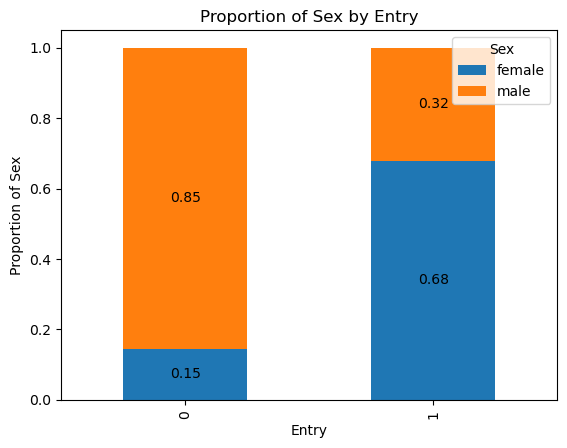

In [227]:
# Calculate the proportion of gender within each entry and plot a stacked bar plot
entry_sex = df.groupby(['Entry','Sex']).size()
unstack_entry_sex = entry_sex.unstack(fill_value=0)
prop_entry_sex = unstack_entry_sex.div(unstack_entry_sex.sum(axis=1), axis=0)
prop_entry_sex_bar = prop_entry_sex.plot(kind='bar', stacked=True)

plt.xlabel('Entry')  
plt.ylabel('Proportion of Sex') 
plt.title('Proportion of Sex by Entry')
plt.legend(title='Sex', loc ='upper right')  
for bars in prop_entry_sex_bar.containers:
    prop_entry_sex_bar.bar_label(bars, fmt='%.2f', label_type='center')

plt.show()

Among people who were rejected, 85% were male while for people who were admitted 68% were female. Is it because there's actual correlation? Befor we jump to the conclusion, let's examine the overall gender distribution in the dataset.

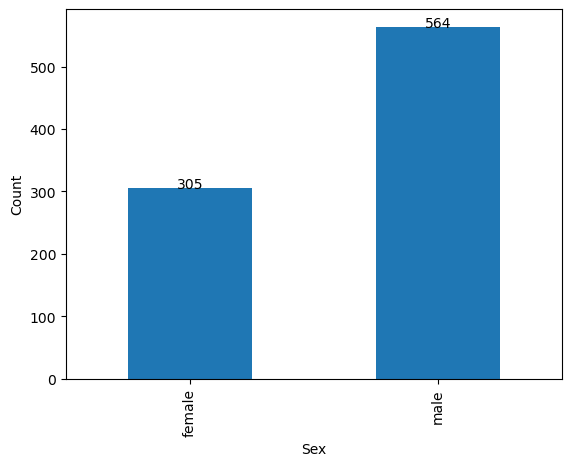

In [228]:
# Plot a bar plot comparing the size of each gender
sex_s = df.groupby('Sex').size()
sex_plt = sex_s.plot(kind = 'bar')

plt.xlabel('Sex')
plt.ylabel('Count')
for i in sex_plt.patches:
    sex_plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center')

plt.show()

Given that the dataset consists of 305 females and 564 males, the initial suspicion regarding a correlation between gender and entrance outcomes appears to be substantiated.

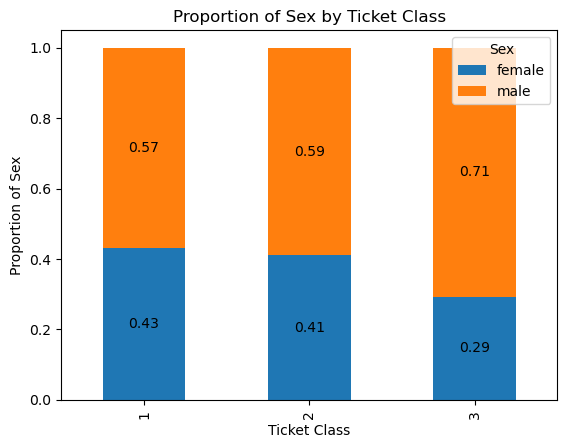

In [229]:
# Calculate the proportion of gender within each ticket class and plot a stacked bar plot, to check if the imbalance is because of females tend to ordered more of 1st class ticket
ticket_sex = df.groupby(['TicketClass','Sex']).size()
unstack_ticket_sex = ticket_sex.unstack(fill_value=0)
prop_ticket_sex = unstack_ticket_sex.div(unstack_ticket_sex.sum(axis=1), axis=0)
prop_ticket_sex_bar = prop_ticket_sex.plot(kind='bar', stacked=True)

plt.xlabel('Ticket Class')  
plt.ylabel('Proportion of Sex') 
plt.title('Proportion of Sex by Ticket Class')
plt.legend(title='Sex', loc ='upper right')  
for bars in prop_ticket_sex_bar.containers:
    prop_ticket_sex_bar.bar_label(bars, fmt='%.2f', label_type='center')

plt.show()

We can observe that the proportion of females is highest in 1st class, and lowest in 3rd class but there's a limit to conclude that the differerence is significant. 

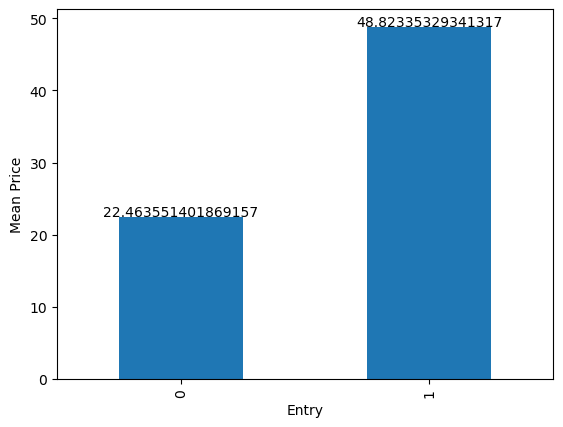

In [230]:
# Plot a bar plot comparing the average ticket price for entry = 0/1
entry_p_mean = df.groupby('Entry')['Price'].mean()
entry_p_mean_plt = entry_p_mean.plot(kind = 'bar')

plt.xlabel('Entry')
plt.ylabel('Mean Price')
for i in entry_p_mean_plt.patches:
    entry_p_mean_plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center')

plt.show()

Naturally, the average ticket price for those who were accepted is more than twice as expensive as for those who were denied.

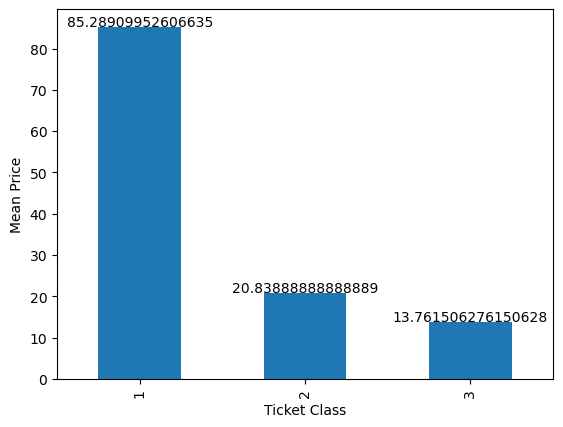

In [231]:
# Plot a bar plot comparing the average ticket price for each ticket class
ticket_p_mean = df.groupby('TicketClass')['Price'].mean()
ticket_p_mean_plt = ticket_p_mean.plot(kind = 'bar')

plt.xlabel('Ticket Class')
plt.ylabel('Mean Price')
for i in ticket_p_mean_plt.patches:
    ticket_p_mean_plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center')

plt.show()

The 1st class ticket is the most expensive of all classes; no wonder that 1st class customers were granted entry the most.

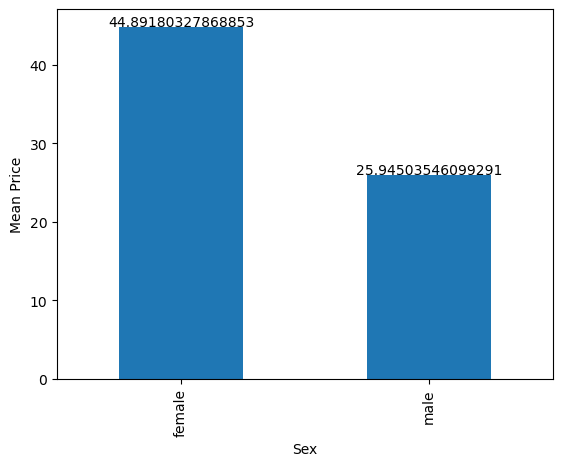

In [232]:
# Plot a bar plot comparing the average ticket price for each sex paid
sex_p_mean = df.groupby('Sex')['Price'].mean()
sex_p_mean_plt = sex_p_mean.plot(kind = 'bar')

plt.xlabel('Sex')
plt.ylabel('Mean Price')
for i in sex_p_mean_plt.patches:
    sex_p_mean_plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center')

plt.show()

Female tend to pay more for the ticket, which aligns with the ticket class proportion by gender.

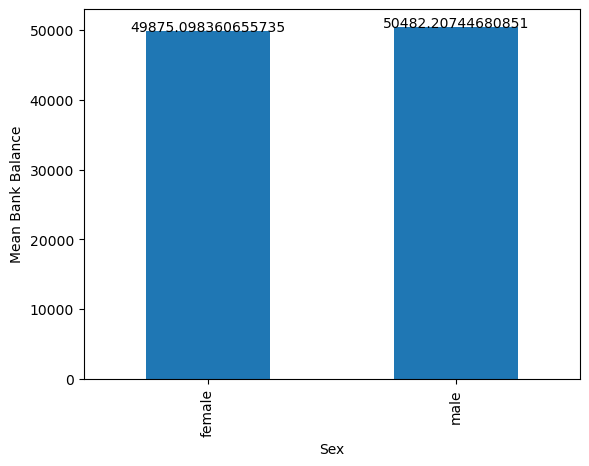

In [233]:
# Plot a bar plot comparing the average bank balance for each sex
sex_p_mean = df.groupby('Sex')['Bank Balance'].mean()
sex_p_mean_plt = sex_p_mean.plot(kind = 'bar')

plt.xlabel('Sex')
plt.ylabel('Mean Bank Balance')
for i in sex_p_mean_plt.patches:
    sex_p_mean_plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center')

plt.show()

Then, are females richer than males? The average bank balance suggests otherwise.

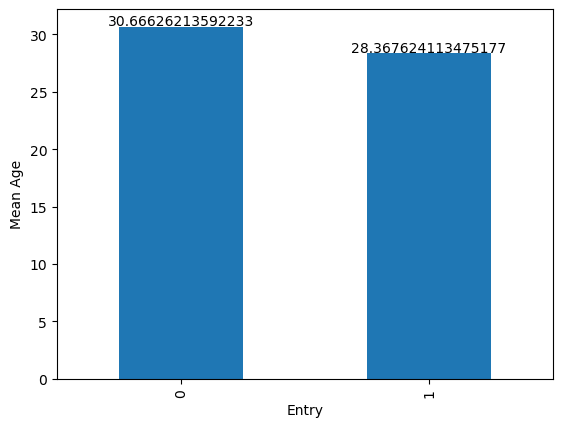

In [234]:
# Plot a bar plot comparing the average age by entry
entry_age_mean = df.groupby('Entry')['Age'].mean()
entry_age_mean_plt = entry_age_mean.plot(kind = 'bar')

plt.xlabel('Entry')
plt.ylabel('Mean Age')
for i in entry_age_mean_plt.patches:
    entry_age_mean_plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center')

plt.show()

Age does not seem to be related with entry acceptance

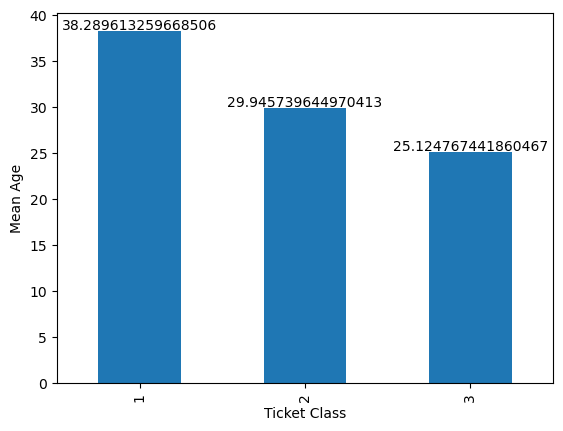

In [235]:
# Plot a bar plot comparing the average age by ticket class
ticket_age_mean = df.groupby('TicketClass')['Age'].mean()
ticket_age_mean_plt = ticket_age_mean.plot(kind = 'bar')

plt.xlabel('Ticket Class')
plt.ylabel('Mean Age')
for i in ticket_age_mean_plt.patches:
    ticket_age_mean_plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(i.get_height()), ha='center')

plt.show()

The average age and ticket class are negatively correlated, but the correlation does not appear to be strong.

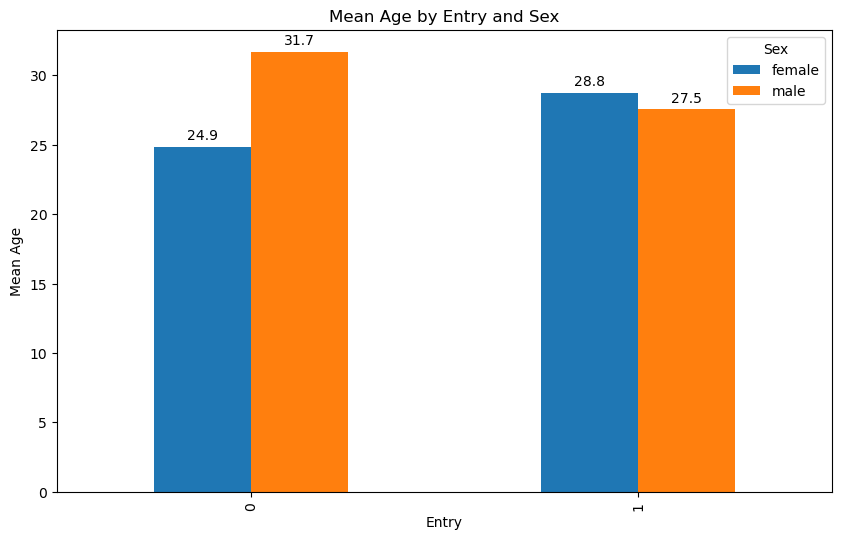

In [236]:
# Plot a bar plot showing average age by entry and by age
mean_age = df.groupby(['Entry','Sex'])['Age'].mean()
mean_age_plt = mean_age.unstack().plot(kind='bar', figsize=(10, 6))

plt.title('Mean Age by Entry and Sex')  
plt.xlabel('Entry')  
plt.ylabel('Mean Age')
plt.legend(title='Sex')
for container in mean_age_plt.containers:
    mean_age_plt.bar_label(container, fmt='%.1f', padding=3)
plt.show()

The average age of males is higher than that of females among those who were not offered entry. There is no significant difference between females and males in the accepted entry group.

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Sex            869 non-null    object 
 3   Age            694 non-null    float64
 4   Price          869 non-null    int64  
 5   Order          869 non-null    int64  
 6   Name           869 non-null    object 
 7   Ticket Number  869 non-null    int64  
 8   Bank Balance   869 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


In [238]:
# Change categorical variable(Sex) to dummies before plotting a heatmap
df2 =pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Drop unnecessary variables such as Name, Order and Ticket Number
df2 = df2.drop(['Name', 'Order', 'Ticket Number'], axis = 1)

df2.head()

,Entry,TicketClass,Age,Price,Bank Balance,Sex_male
0,0,3,22.0,7,74389,1
1,1,1,38.0,71,94932,0
2,1,3,26.0,8,26146,0
3,1,1,35.0,53,35627,0
4,0,3,35.0,8,60457,1


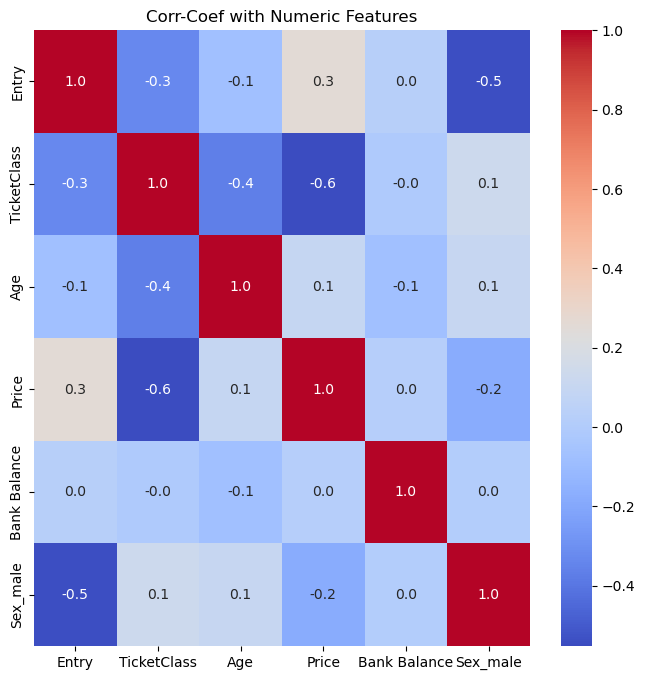

In [239]:
# plot a heatmap to check if any numerical variables are highly correlated to each other.
# Heatmap to identify any correlation between 2 features
corr_coef = df2.iloc[:,0:].corr() # create a correlation-coefficient matrix

# Plot a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_coef, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Corr-Coef with Numeric Features")
plt.show()

While no extremely strong correlation was detected through the heatmap, customers' gender is moderately correlated with entry, making it one of the most important variables. Although not strong, ticket class and price exhibit a weak positive relationship with entry. Furthermore, these two variables are more correlated with each other than with entry, hence the inclusion of an interaction term between the two in the model might address endogeneity. For the same reason, including the interaction term of Age and Ticket Class could help handle possible endogeneity. Bank balance shows no correlation with Entry but has a very weak correlation with Age (0.1). Therefore, excluding Bank Balance and adding an interaction term of Bank Balance and Age might slightly better benefit the model.

##### 2. PCA Analysis (25)
Split the dataset into training and testing sets and encode the variables if needed.

Develop a Logistic regression model to predict If the entry to the event will be granted on not. (Use at least 6 dimensions)

Use PCA to reduce dimensions, try with 2, 4, and 6 dimensions

Use the above 2,4,6 dimensions to train and test the Logistic Regression Model and evaluate the impact it has on the performance.

Compare the OOS performance with that of a LASSO Logistic Regression Model.

(Tip: Many times, PCA reduces accuracy but the computation is much lighter and that is the tradeoff you can consider while building models in real life)

In [240]:
# Impute any missing values in Age with median
df2['Age'] = df2['Age'].fillna(df2['Age'].median())
df2.isnull().sum()

Entry           0
TicketClass     0
Age             0
Price           0
Bank Balance    0
Sex_male        0
dtype: int64

In [241]:
# Add a column for interaction between Ticket Class and Price
df2['TicketClass_Price'] = df2['TicketClass'] * df2['Price']
df2['TicketClass_Age'] = df2['TicketClass'] * df2['Age']
df2['BankBalance_Age'] = df2['Bank Balance'] * df2['Age']

df2 = df2.drop('Bank Balance', axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entry              869 non-null    int64  
 1   TicketClass        869 non-null    int64  
 2   Age                869 non-null    float64
 3   Price              869 non-null    int64  
 4   Sex_male           869 non-null    uint8  
 5   TicketClass_Price  869 non-null    int64  
 6   TicketClass_Age    869 non-null    float64
 7   BankBalance_Age    869 non-null    float64
dtypes: float64(3), int64(4), uint8(1)
memory usage: 48.5 KB


In [242]:
# Define X and y variables and split the dataset into test and train set 
X = df2.drop('Entry',axis=1)
y=df2['Entry']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size = 0.3,
                                                 random_state = 11)

##### Plain Logistic Regression Model

In [243]:
logit_model = LogisticRegression() # Plain Logistic regression model 

# Fit the logistic regression model on training data
logit_model.fit(X_train, y_train)

# Make predictions on test data
logit_y_pred = logit_model.predict(X_test)

# Evaluate the model with accuracy and confusion matrix 
logit_accuracy = accuracy_score(y_test, logit_y_pred)
logit_conf_matrix = confusion_matrix(y_test, logit_y_pred)
logit_class_report = classification_report(y_test, logit_y_pred)

# Print the result
print("Accuracy of the Logistic Regression Model:", logit_accuracy)
print("Confusion Matrix:\n", logit_conf_matrix)
print("Classification Report:\n", logit_class_report)

Accuracy of the Logistic Regression Model: 0.7471264367816092
Confusion Matrix:
 [[153  23]
 [ 43  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       176
           1       0.65      0.49      0.56        85

    accuracy                           0.75       261
   macro avg       0.71      0.68      0.69       261
weighted avg       0.74      0.75      0.74       261



##### LASSO Logistic Regression Model

In [244]:
# Lasso and Ridge are sensitive to scale so scale all of the X variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [245]:
# Create a logistic regression model with L1 penalty
lasso_logit_model = LogisticRegressionCV(penalty='l1', Cs=np.logspace(-4, 4, 20), cv=10, solver='saga', max_iter=10000, random_state=42) # Lasso = L1 penalty, Cs = the inverse of the alpha parameter, controls the strength of penalty

# Fit the model
lasso_logit_model.fit(X_train_scaled, y_train)

# Make predictions on test data
lasso_logit_y_pred = lasso_logit_model.predict(X_test_scaled)

# Evaluate the model with accuracy and confusion matrix 
lasso_logit_accuracy = accuracy_score(y_test, lasso_logit_y_pred)
lasso_logit_conf_matrix = confusion_matrix(y_test, lasso_logit_y_pred)
lasso_logit_class_report = classification_report(y_test, lasso_logit_y_pred)

# Print the result
print("Accuracy of the Logistic Regression Model:", lasso_logit_accuracy)
print("Confusion Matrix:\n", lasso_logit_conf_matrix)
print("Classification Report:\n", lasso_logit_class_report)

Accuracy of the Logistic Regression Model: 0.7931034482758621
Confusion Matrix:
 [[151  25]
 [ 29  56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       176
           1       0.69      0.66      0.67        85

    accuracy                           0.79       261
   macro avg       0.77      0.76      0.76       261
weighted avg       0.79      0.79      0.79       261



##### Try PCA with 2,4,6 dimensions

6 Dimensions

In [246]:
# Calculate 6 dimensions PCA using X, y

# First, standardize the X variables 
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns) # Save the np.array as a DataFrame
#X_scaled.head()

# Fit PCA 
pca_6 = PCA(n_components= 6)
X_pca_6 = pca_6.fit_transform(X_scaled)

# X_pca_6 is a np.array. convert it back to Dataframe
X_pca_6 = pd.DataFrame(X_pca_6, columns=[f'PC{i+1}' for i in range(6)])

X_pca_6.head() # Print the results

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.121586,-0.490013,-0.189466,0.513864,-0.602179,-0.130771
1,1.875122,1.653756,-0.702002,-1.541695,-0.964024,-0.027275
2,-0.795505,-0.840262,0.893059,-1.235822,0.368470,-0.117119
3,1.569871,0.151380,-0.716710,-1.421541,0.678387,0.004473
4,-1.621842,0.882650,0.388549,0.496257,-0.245782,-0.179071


In [247]:
# Split the dataframe into Test and Train set before fitting logistic regression
X_pca_6_train, X_pca_6_test, y_train, y_test = train_test_split(X_pca_6,y,
                                                 test_size = 0.3,
                                                 random_state = 11)

# Fit the logistic regression model on training data
logit_model.fit(X_pca_6_train, y_train)

# Make predictions on test data
pca_6_logit_y_pred = logit_model.predict(X_pca_6_test)

# Evaluate the model with accuracy and confusion matrix 
pca_6_logit_accuracy = accuracy_score(y_test, pca_6_logit_y_pred)
pca_6_logit_conf_matrix = confusion_matrix(y_test, pca_6_logit_y_pred)
pca_6_logit_class_report = classification_report(y_test, pca_6_logit_y_pred)

# Print the result
print("Accuracy of the Logistic Regression Model with 6 Dimensions:", pca_6_logit_accuracy)
print("Confusion Matrix with 6 Dimensions:\n", pca_6_logit_conf_matrix)
print("Classification Report with 6 Dimensions:\n", pca_6_logit_class_report)

Accuracy of the Logistic Regression Model with 6 Dimensions: 0.7931034482758621
Confusion Matrix with 6 Dimensions:
 [[150  26]
 [ 28  57]]
Classification Report with 6 Dimensions:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       176
           1       0.69      0.67      0.68        85

    accuracy                           0.79       261
   macro avg       0.76      0.76      0.76       261
weighted avg       0.79      0.79      0.79       261



4 Dimensions

In [248]:
# Calculate 4 dimensions PCA using X, y

# Fit PCA 
pca_4 = PCA(n_components= 4)
X_pca_4 = pca_4.fit_transform(X_scaled)

# X_pca_4 is a np.array. convert it back to Dataframe
X_pca_4 = pd.DataFrame(X_pca_4, columns=[f'PC{i+1}' for i in range(4)])

X_pca_4.head() # Print the results

,PC1,PC2,PC3,PC4
0,-1.121586,-0.490013,-0.189466,0.513864
1,1.875122,1.653756,-0.702002,-1.541695
2,-0.795505,-0.840262,0.893059,-1.235822
3,1.569871,0.151380,-0.716710,-1.421541
4,-1.621842,0.882650,0.388549,0.496257


In [249]:
# Split the dataframe into Test and Train set before fitting logistic regression
X_pca_4_train, X_pca_4_test, y_train, y_test = train_test_split(X_pca_4,y,
                                                 test_size = 0.3,
                                                 random_state = 11)

# Fit the logistic regression model on training data
logit_model.fit(X_pca_4_train, y_train)

# Make predictions on test data
pca_4_logit_y_pred = logit_model.predict(X_pca_4_test)

# Evaluate the model with accuracy and confusion matrix 
pca_4_logit_accuracy = accuracy_score(y_test, pca_4_logit_y_pred)
pca_4_logit_conf_matrix = confusion_matrix(y_test, pca_4_logit_y_pred)
pca_4_logit_class_report = classification_report(y_test, pca_4_logit_y_pred)

# Print the result
print("Accuracy of the Logistic Regression Model with 4 Dimensions:", pca_4_logit_accuracy)
print("Confusion Matrix with 4 Dimensions:\n", pca_4_logit_conf_matrix)
print("Classification Report with 4 Dimensions:\n", pca_4_logit_class_report)

Accuracy of the Logistic Regression Model with 4 Dimensions: 0.789272030651341
Confusion Matrix with 4 Dimensions:
 [[150  26]
 [ 29  56]]
Classification Report with 4 Dimensions:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       176
           1       0.68      0.66      0.67        85

    accuracy                           0.79       261
   macro avg       0.76      0.76      0.76       261
weighted avg       0.79      0.79      0.79       261



2 Dimensions

In [250]:
# Calculate 2 dimensions PCA using X, y

# Fit PCA 
pca_2 = PCA(n_components= 2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# X_pca_2 is a np.array. convert it back to Dataframe
X_pca_2 = pd.DataFrame(X_pca_2, columns=[f'PC{i+1}' for i in range(2)])

X_pca_2.head() # Print the results

,PC1,PC2
0,-1.121586,-0.490013
1,1.875122,1.653756
2,-0.795505,-0.840262
3,1.569871,0.151380
4,-1.621842,0.882650


In [251]:
# Split the dataframe into Test and Train set before fitting logistic regression
X_pca_2_train, X_pca_2_test, y_train, y_test = train_test_split(X_pca_2,y,
                                                 test_size = 0.3,
                                                 random_state = 11)

# Fit the logistic regression model on training data
logit_model.fit(X_pca_2_train, y_train)

# Make predictions on test data
pca_2_logit_y_pred = logit_model.predict(X_pca_2_test)

# Evaluate the model with accuracy and confusion matrix 
pca_2_logit_accuracy = accuracy_score(y_test, pca_2_logit_y_pred)
pca_2_logit_conf_matrix = confusion_matrix(y_test, pca_2_logit_y_pred)
pca_2_logit_class_report = classification_report(y_test, pca_2_logit_y_pred)

# Print the result
print("Accuracy of the Logistic Regression Model with 2 Dimensions:", pca_2_logit_accuracy)
print("Confusion Matrix with 2 Dimensions:\n", pca_2_logit_conf_matrix)
print("Classification Report with 2 Dimensions:\n", pca_2_logit_class_report)

Accuracy of the Logistic Regression Model with 2 Dimensions: 0.7509578544061303
Confusion Matrix with 2 Dimensions:
 [[153  23]
 [ 42  43]]
Classification Report with 2 Dimensions:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       176
           1       0.65      0.51      0.57        85

    accuracy                           0.75       261
   macro avg       0.72      0.69      0.70       261
weighted avg       0.74      0.75      0.74       261



**Evaluate the impact of the dimensionality reduction has on the performance**

- Accuracy of the Logistic Regression Model with 6 Dimensions: 0.7931034482758621 

- Accuracy of the Logistic Regression Model with 4 Dimensions: 0.789272030651341

- Accuracy of the Logistic Regression Model with 2 Dimensions: 0.7509578544061303

Overall, PCA models are better performing than the basic, non-Lasso logistic regression model containing all X variables(accuracy = 0.7471). And the accuracy tends to decrease as the number of dimension decreases in PCA. This is natural as PCA trades off the model complexity and performance.

The precision and recall for each class remain robust in 6 dimensions and 4 dimensions model, suggesting that the models are well balancing the dimensionality reduction and information retension. However, in the 2 dimensional model, all the metrics drops significantly which means that the reduction to 2 dimensions overly simplifies the model.




**Compare the OOS performance with that of a LASSO Logistic Regression Model**

- Accuracy of the Logistic Regression Model: 0.7931034482758621

The Lasso Logistic Regression model and the PCA model with 6 dimensions both achieve the same accuracy (0.7931). This suggests that both methods are equally effective in optimizing the model for the given dataset.

Compared to the PCA models with fewer dimensions, the Lasso Logistic Regression model matches the highest performance, indicating that it retains essential information while possibly eliminating irrelevant features through the regularization.

##### 3. Decision Tree Analysis (25)
Train the decision tree classifier using the training data.

Predict the accuracy of model using test data and explain the results.

Data preprocessing: 

* We shouldn't include any interaction term for the tree modelm as the nature of the tree structure itself allows for interactions without having to specify them explicitly.
(https://stats.stackexchange.com/questions/63788/how-to-include-interaction-terms-in-r-tree-model)

* Thus, I'll remove the interacion term and have the original variables back to the dataset.

In [252]:
# Drop Order, Name, and Ticket Number from the original dataset
df3 = df.drop(['Order', 'Name', 'Ticket Number'],axis=1)
df3.head()

,Entry,TicketClass,Sex,Age,Price,Bank Balance
0,0,3,male,22.0,7,74389
1,1,1,female,38.0,71,94932
2,1,3,female,26.0,8,26146
3,1,1,female,35.0,53,35627
4,0,3,male,35.0,8,60457


In [253]:
#df3.isnull().sum()
# Impute any missing values in Age with median
df3['Age'] = df3['Age'].fillna(df3['Age'].median())
df3.isnull().sum()

Entry           0
TicketClass     0
Sex             0
Age             0
Price           0
Bank Balance    0
dtype: int64

In [254]:
# Encode the categotical variable(Sex)
df4 =pd.get_dummies(df3, columns=['Sex'], drop_first=True)
df4.head()

,Entry,TicketClass,Age,Price,Bank Balance,Sex_male
0,0,3,22.0,7,74389,1
1,1,1,38.0,71,94932,0
2,1,3,26.0,8,26146,0
3,1,1,35.0,53,35627,0
4,0,3,35.0,8,60457,1


In [255]:
# Define X and y variables and split the dataset into test and train set 
X = df4.drop('Entry',axis=1)
y=df4['Entry']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size = 0.3,
                                                 random_state = 11)

Train the Decision Tree Classifier model 

In [256]:
tree = DecisionTreeClassifier(random_state=11)

# Fit the model on the training dataset
tree.fit(X_train, y_train)

# Make predictions on test data
tree_y_pred = tree.predict(X_test)

# Predict the accuracy of model using test data
tree_accuracy = accuracy_score(y_test, tree_y_pred)

# Print the result
print("Accuracy of the Desion Tree Classifier:", tree_accuracy)

Accuracy of the Desion Tree Classifier: 0.735632183908046


**Explain the results**

The accuracy of the Decision Tree Classifier is 0.7356, and this metrics prepresents proportion of the total number of predictions that were correct either True or False `(TP+TN)/(TP+FP+TN+FN)`. In other words, it implies that around 0.7356 of the time, this model would correctly predict whether an instance belongs to the target class (0 or 1).

##### 4. K Means Clustering(30)
Use the Entry_event database and use the Age and Price columns only (drop all other columns)

In [257]:
# Drop all columns but Age and Price from df4
df5 = df4[['Age','Price']]
df5.head()

,Age,Price
0,22.0,7
1,38.0,71
2,26.0,8
3,35.0,53
4,35.0,8


In [258]:
# Standardize the variables before jumping into the KMeans
df5_scaled = scaler.fit_transform(df5)
# Convert the np.array back to the DataFrame 
df5_scaled = pd.DataFrame(df5_scaled, columns = df5.columns)
df5_scaled.head()

,Age,Price
0,-0.565519,-0.510294
1,0.659975,0.765694
2,-0.259146,-0.490357
3,0.430195,0.406822
4,0.430195,-0.490357


Perform Kmeans Clustering for different values of K & Drawing Elbow Plot

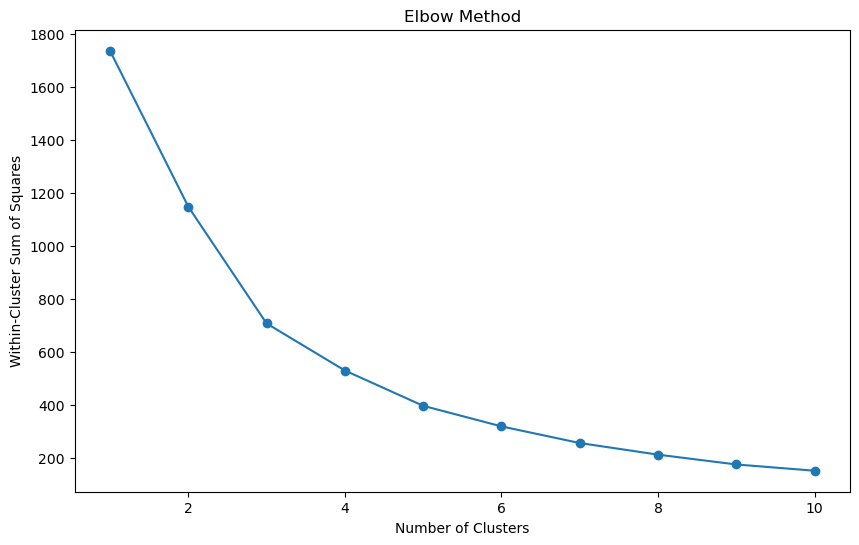

In [259]:
# Elbow rule
deviances = [KMeans(n_clusters=k, random_state=11, n_init=10).fit(df5_scaled).inertia_ for k in range(1, 11)] # Perform KMeans from K=1 to K=10

# Plot the deviances
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), deviances, marker='o', linestyle='-')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()

Based on the Elbow Method, K=4 appears to be the appropriate choice for the number of clusters.

In the graph, the deviance rapidly declines as the number of clusters increases from 1 to 4. Beyond K=4, the rate of decrease in deviance slows significantly. Choosing more than 4 clusters could lead to overfitting, where the model becomes excessively tailored to the sample data, potentially sacrificing its generalizability. Conversely, selecting a K value that is too low might result in underfitting, where significant distinctions within the data are not properly captured.

Create the clusters using the above value of K & Plot a graph to show the different clusters

In [260]:
# Fit the scaled data into four clusters(K=4)
kmeans_model = KMeans(n_clusters=4, random_state=11, n_init=10)
entry_clusters = kmeans_model.fit(df5_scaled)

# Display the cluster centers
print("Cluster Centers:\n", kmeans_model.cluster_centers_)

Cluster Centers:
 [[-1.20609183 -0.18049795]
 [-0.0297571  -0.23667614]
 [ 0.04924122  3.78762219]
 [ 1.59736868  0.1164932 ]]


In [261]:
# Assign the cluster labels to the original dataframe
df['Cluster'] = entry_clusters.labels_

df.head()

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance,Cluster
0,0,3,male,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389,1
1,1,1,female,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932,3
2,1,3,female,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146,1
3,1,1,female,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627,1
4,0,3,male,35.0,8,5,"Allen, Mr. William Henry",510583,60457,1


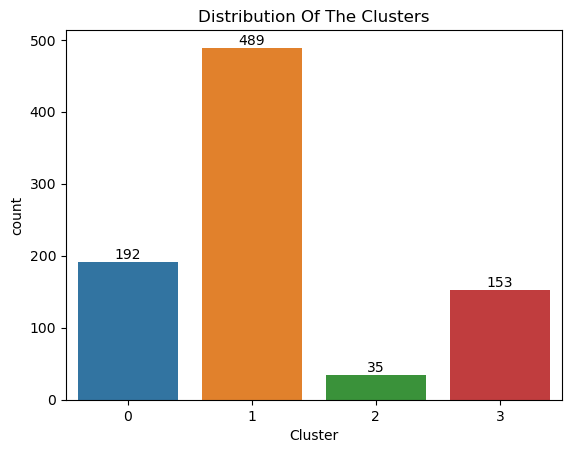

In [262]:
# Plotting countplot of clusters to check size of each cluster
ax = sns.countplot(x=df['Cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Distribution Of The Clusters")
plt.show()

Cluster number 1 has the largest number of instances, while Cluster 2 has only 35.

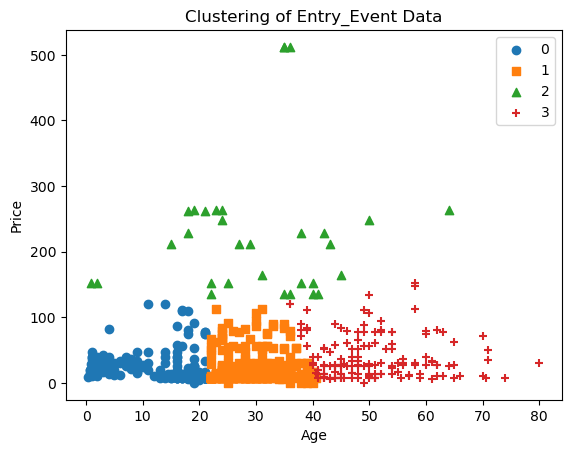

In [263]:
# Plot a scatterplot to show the cluster results
# Extract the pca_x and pca_y values separately for each cluster with values 0, 1, and 2, using distinct indices for each cluster.
marker0_ind = df[df['Cluster']==0].index
marker1_ind = df[df['Cluster']==1].index
marker2_ind = df[df['Cluster']==2].index
marker3_ind = df[df['Cluster']==3].index

# Extract the pca_x and pca_y values for each cluster level corresponding to cluster values 0, 1, and 2. Mark them with markers o, s, and ^, respectively
plt.scatter(x=df.loc[marker0_ind,'Age'], y=df.loc[marker0_ind,'Price'], marker='o', label = '0')
plt.scatter(x=df.loc[marker1_ind,'Age'], y=df.loc[marker1_ind,'Price'], marker='s', label = '1')
plt.scatter(x=df.loc[marker2_ind,'Age'], y=df.loc[marker2_ind,'Price'], marker='^', label = '2')
plt.scatter(x=df.loc[marker3_ind,'Age'], y=df.loc[marker3_ind,'Price'], marker='+', label = '3')

plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Clustering of Entry_Event Data')
plt.legend()
plt.show()

Despite the small size of Cluster 2 (with green markers), these customers are distinctly different in terms of the ticket prices they paid. Therefore, choosing K=4 as the number of clusters remains justified.